# Simple Workflow for Finding Sentiment Pairs

### Load your dataset of news

In [ ]:
!pip install pandas seaborn matplotlib
# Set up the dependencies
!pip install numpy pandas torch transformers finvader pysentiment2 scipy nltk
# Set up the dependencies
!pip install openpyxl


In [4]:
import pandas as pd
# Load the data
finance_news = pd.read_csv('0.1_merged_headlines70weeks.csv', encoding='ISO-8859-1')
finance_news.head()

,versionCreated,headline,storyId,sourceCode,RIC,weekID
0,2024-05-23 21:46:35.846,Microsoft May Acquire Valve for USD16 Billion,urn:newsml:reuters.com:20240523:nNRAsrj9ox:1,NS:DATMTR,MSFT.O,MSFT.O-week1
1,2024-05-23 20:05:08.150,MICROSOFT CORP -- 144,urn:newsml:reuters.com:20240523:nEOL9PLzHc:1,NS:EDG,MSFT.O,MSFT.O-week1
2,2024-05-23 19:43:39.843,Microsoft and G42 announce $1bn digital invest...,urn:newsml:reuters.com:20240523:nNRAsri0mf:1,NS:DATMTR,MSFT.O,MSFT.O-week1
3,2024-05-23 19:41:37.531,Informatica Unveils Trio of Native Integration...,urn:newsml:reuters.com:20240523:nNRAsrhyax:1,NS:DATMTR,MSFT.O,MSFT.O-week1
4,2024-05-23 19:41:08.041,Explainer: does Microsoft's Recall pose a secu...,urn:newsml:reuters.com:20240523:nNRAsrhzs6:1,NS:DATMTR,MSFT.O,MSFT.O-week1


### Run Sentiment Analysis 
To run sentiment analysis we can just call a SentimentAnalysis Class and pass in the following parameters. As you can see we have integrated 13 LLMs and Lexicons to run our analysis. 

Each of them have shown very accurate and promising results over many previous research works, some of the reaching over 97% accuracy on well-known Finanacial PhraseBank Dataset. 

In [ ]:
"""
                                    << SentimentAnalysis (module) >>

Class Initialization Inputs:
    (1) path_to_news                : str  | Path to the news data file.
    (2) path_to_save_results        : str  | Path to save the analysis results.
    (3) use_finBERT                 : bool | Whether to use FinBERT for sentiment analysis (default: True).
    (4) use_finBERT_pro             : bool | Whether to use FinBERT-pro for sentiment analysis (default: True).
    (5) use_vader                   : bool | Whether to use VADER for sentiment analysis (default: True).
    (6) use_finvader                : bool | Whether to use finVADER for sentiment analysis (default: True).
    (7) use_hiv4                    : bool | Whether to use HIV4 for sentiment analysis (default: True).
    (8) use_lmd                     : bool | Whether to use LMD for sentiment analysis (default: True).
    (9) use_distil_roberta          : bool | Whether to use DistilRoBERTa for sentiment analysis (default: True).
    (10) use_financialBERT          : bool | Whether to use FinancialBERT for sentiment analysis (default: True).
    (11) use_sigma                  : bool | Whether to use Sigma for sentiment analysis (default: True).
    (12) use_twit_roberta_base      : bool | Whether to use Twitter-roBERTa-base for sentiment analysis (default: True).
    (13) use_twit_roberta_large     : bool | Whether to use Twitter-roBERTa-large for sentiment analysis (default: True).
    (14) use_fin_roberta            : bool | Whether to use Financial-RoBERTa for sentiment analysis (default: True).
    (15) use_finllama               : bool | Whether to use FinLLama for sentiment analysis (default: True).
    (16) batch_size                 : int  | Batch size for processing headlines (default: 64).
"""

Here is an example of a run, but this will take quite some time (~8 hrs of run on GPU)

In [ ]:
from sentiment_analysis import SentimentAnalysis

sentiment_analysis = SentimentAnalysis(
    path_to_news='0.1_merged_headlines70weeks.csv',
    path_to_save_results='2.1_SE_extended_scores.csv',
    use_finBERT=True,
    use_finBERT_pro=True,
    use_vader=True,
    use_finvader=True,
    use_hiv4=True,
    use_lmd=True,
    use_distil_roberta=True,
    use_financialBERT=True,
    use_sigma=True,
    use_twit_roberta_base=True,
    use_twit_roberta_large=True,
    use_fin_roberta=True,
    use_finllama=True
)
sentiment_analysis.run_analysis()

However, once the code stops running, you can expect to get this sort of a table with all the sentiment scores:

In [ ]:
results = pd.read_csv("2.1_SE_extended_scores.csv")
results.head()

### Get Daily Sentiment Scores

We can further leverage the use of the class and try to get daily sentiment scores by calling '''get_daily_sentiment'''

In [2]:
sentiment_analysis.get_daily_sentiment() 

{'finBERT_score': 'mean', 'FinBERT-pro_score': 'mean', 'VADER_score': 'mean', 'finVADER_score': 'mean', 'HIV4_Polarity': 'mean', 'LMD_Polarity': 'mean', 'distil_score': 'mean', 'FinancialBERT_score': 'mean', 'Sigma_score': 'mean', 'Twitter_roBERTa_score': 'mean', 'roBERTa_large_score': 'mean', 'Financial_RoBERTa_score': 'mean', 'finllama_score': 'mean'}
Here is the head of the output table: 
  tic       date  finBERT_score  FinBERT-pro_score  VADER_score  \
0   A 2023-02-27       0.060200           0.539600     0.000000   
1   A 2023-02-28       0.042358           0.061947     0.046474   
2   A 2023-03-01       0.836900           0.580800     0.161667   
3   A 2023-03-02       0.000000          -0.017300     0.000000   
4   A 2023-03-03      -0.000850          -0.216000     0.134000   

   finVADER_score  HIV4_Polarity  LMD_Polarity  distil_score  \
0        0.084000            0.0           0.0      0.000100   
1        0.052579            0.0           0.0     -0.000005   
2       -0

And, again the changes are saved in the output_file_name + daily.csv as specified in the output, you can inspect it as below:

In [5]:
results = pd.read_csv("2.1_SE_extended_scores_daily.csv")
results.head()

,tic,date,finBERT_score,FinBERT-pro_score,VADER_score,finVADER_score,HIV4_Polarity,LMD_Polarity,distil_score,FinancialBERT_score,Sigma_score,Twitter_roBERTa_score,roBERTa_large_score,Financial_RoBERTa_score,finllama_score
0,A,2023-02-27,0.060200,0.539600,0.000000,0.084000,0.0,0.0,0.000100,0.001800,-0.000100,0.122800,0.157800,0.997100,0.067900
1,A,2023-02-28,0.042358,0.061947,0.046474,0.052579,0.0,0.0,-0.000005,0.004974,0.000037,0.045268,0.118905,0.255842,0.171626
2,A,2023-03-01,0.836900,0.580800,0.161667,-0.086667,0.0,0.0,0.223600,0.008367,0.000000,0.011333,0.105733,0.663600,0.916667
3,A,2023-03-02,0.000000,-0.017300,0.000000,0.000000,0.0,0.0,0.000000,0.000800,-0.000100,0.009200,0.083800,0.000100,0.000300
4,A,2023-03-03,-0.000850,-0.216000,0.134000,0.044500,0.0,0.0,0.000000,0.003150,-0.000050,-0.007000,0.060000,0.000450,-0.444000


# Correlation between LLMs and Lexicons

Now let's see if there is any correlation between LLMs and Lexicons we have used in this research work. For that purpose we can call 'LexiconCorrelation()' class with the following parameters

In [ ]:
"""
                                         << LexiconCorrelation (module) >>
    => Class Initialization Inputs:
        (1) path_to_file        : str  | Path to the CSV file containing the data.
        (2) path_to_save        : str  | Path to save the computed correlation matrix.
        (3) display_heatmap     : bool | Flag to indicate whether to display the heatmap (default: True).
"""

Let's initialize the class with the option of displaying the heatmap

In [1]:
from lexicon_correlation import LexiconCorrelation
Lexicons = LexiconCorrelation(path_to_file = "2.1_SE_extended_scores_daily.csv",
                              path_to_save = "3.1_Lexicons_Correlation",
                              display_heatmap = True)



Now we run it with '''run_correlation''' function

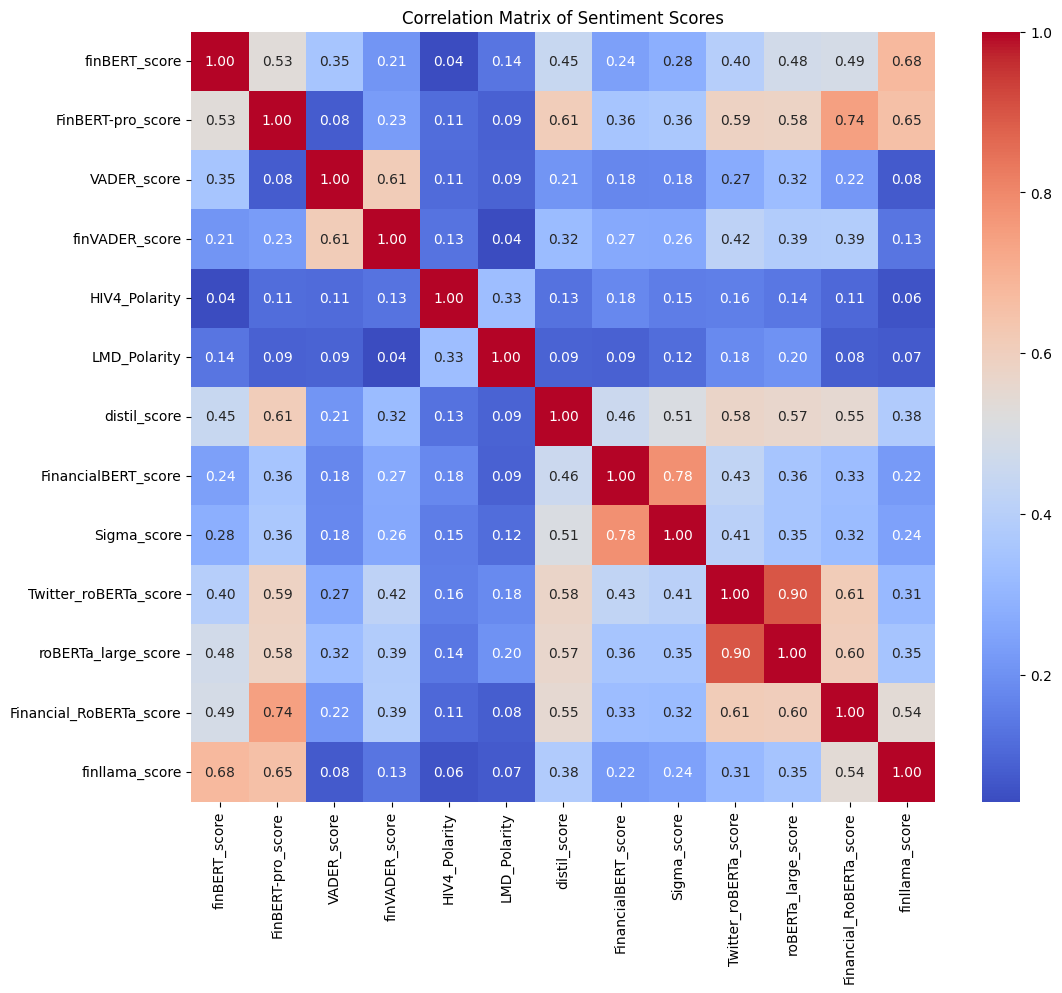

In [2]:
Lexicons.run_correlation()

#### Optionally you can also pass in '''include_return''' as an integer, to see correlation of LLMs/Lexicons and next n day returns

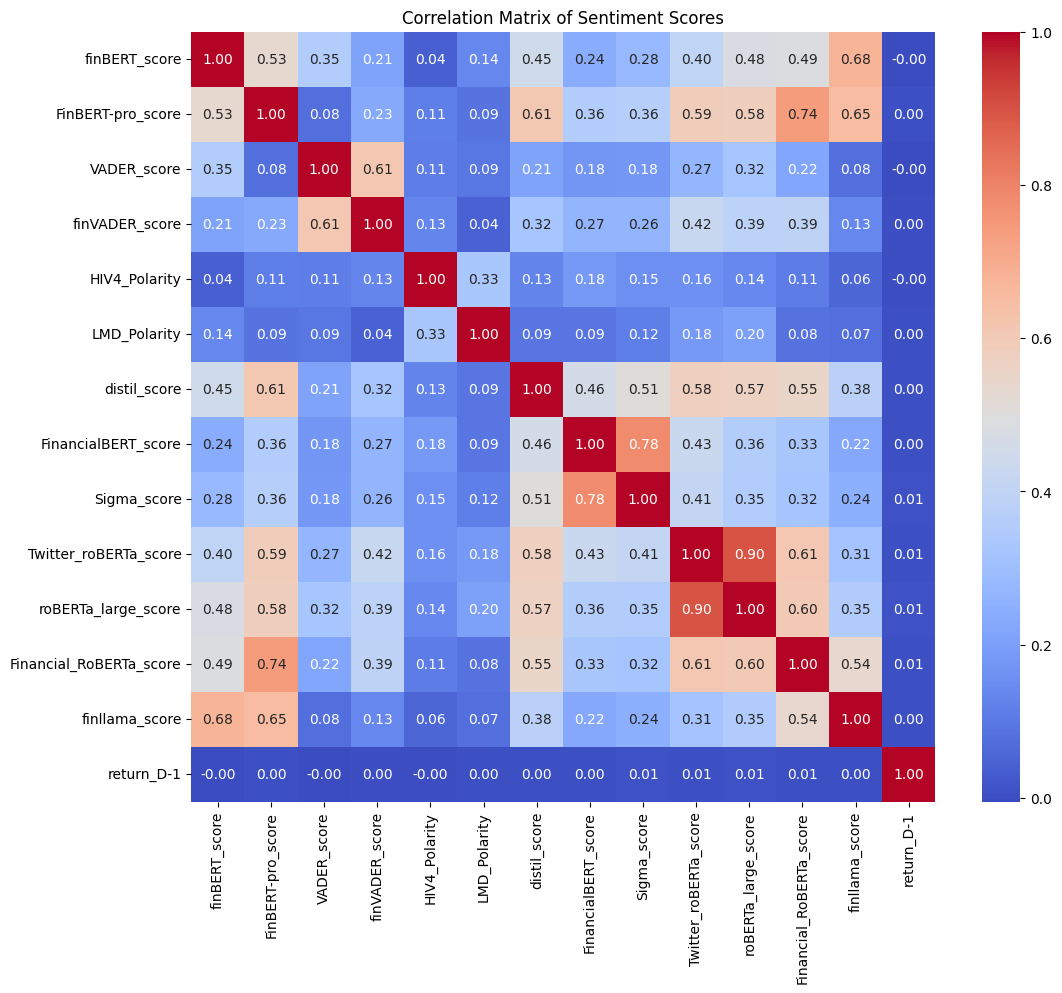

In [3]:
Lexicons.run_correlation(include_return = 1)


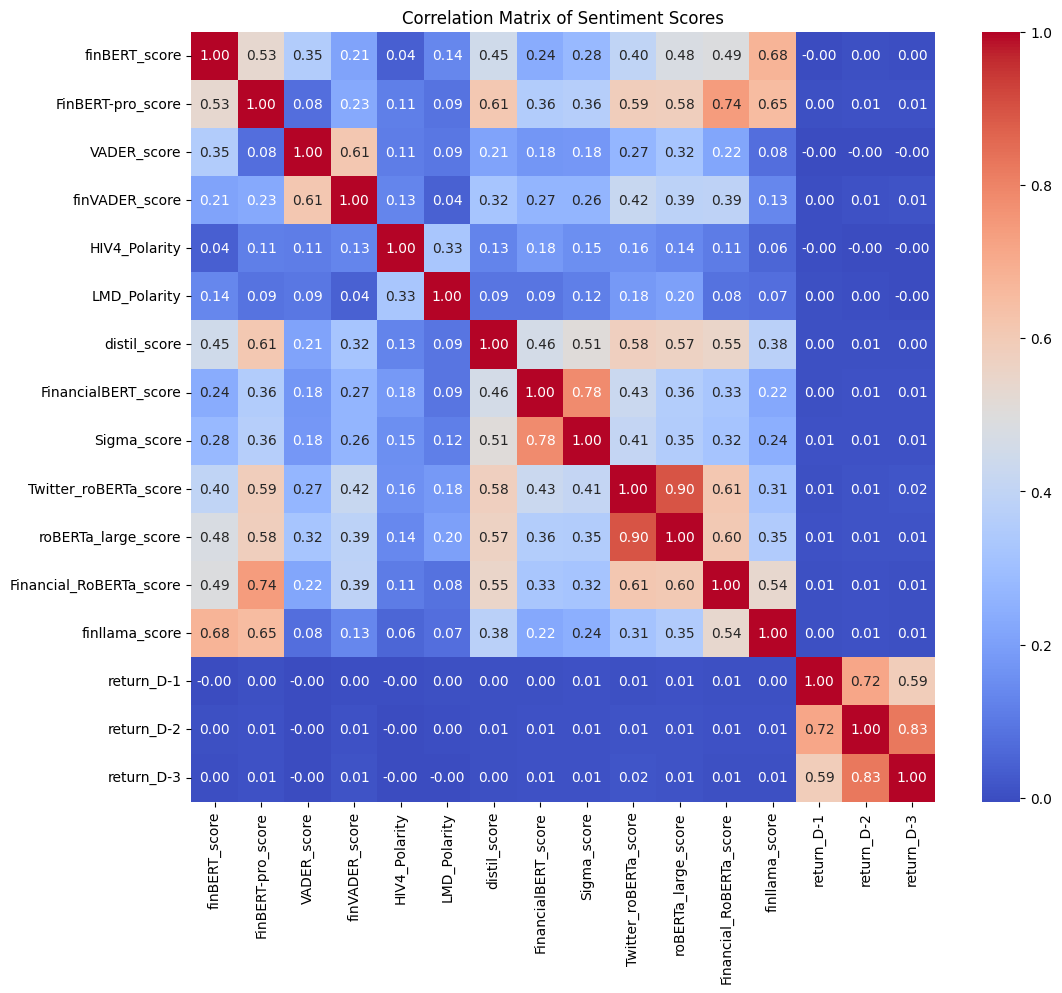

In [4]:
Lexicons.run_correlation(include_return = 3)

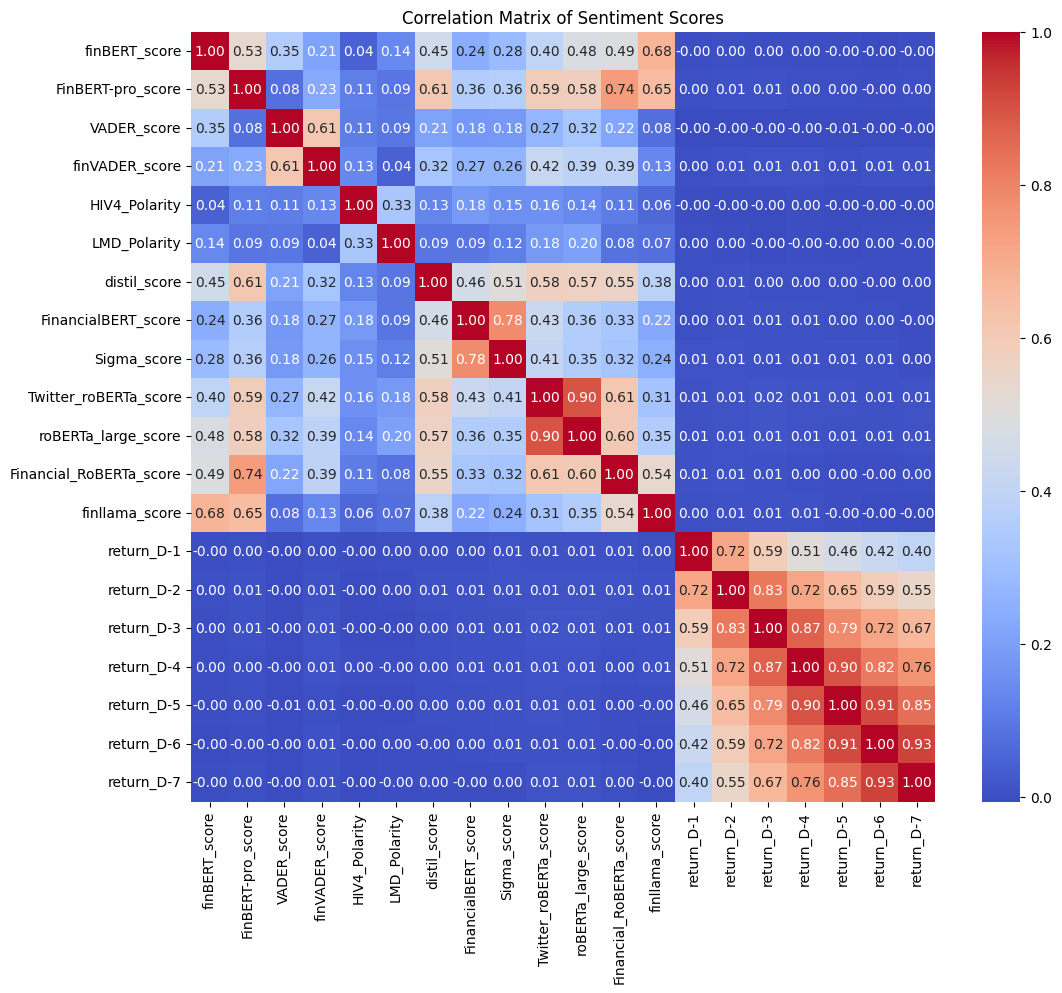

In [5]:
Lexicons.run_correlation(include_return = 7)